### Model training and evaluation

#### Functions:
- Install/confirm required libraries
- load the dataset
- split data into features and target x and y
- split into train and test
- Initialize a model
- train the model
- predict and calculate evaluation metrics
- visualize result with matplotlib
- save trained model


In [ ]:
pip list

In [ ]:
import pandas as pd
merged_df = pd.read_csv("../data/merged_ft_bioavailability.csv")
print (merged_df.head())

In [ ]:
x = merged_df.drop(columns=["Y"])
y = merged_df["Y"]
print(y.head())

print(x.head())

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
import xgboost as xgb  
model = xgb.XGBClassifier(
    learning_rate=0.2,
    max_depth=6,
    random_state=42,
    n_estimators=100,
    scale_pos_weight=2
)  

model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  

y_pred_prob = model.predict_proba(x_test)[:, 1]  

threshold = 0.9
y_pred_custom = (y_pred_prob >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_custom)
precision = precision_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)
f1 = f1_score(y_test, y_pred_custom)
auc = roc_auc_score(y_test, y_pred_prob)  

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {auc:.4f}")


Accuracy: 0.7969
Precision: 0.8396
Recall: 0.9082
F1 Score: 0.8725
AUC Score: 0.7078


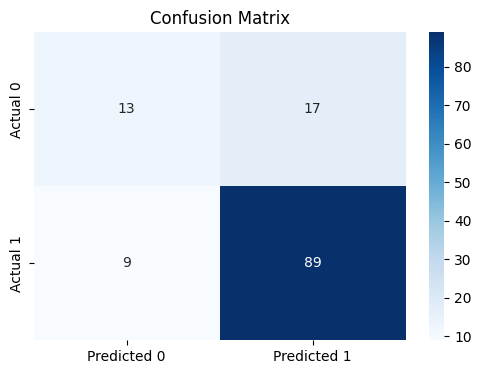

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_custom)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.show()

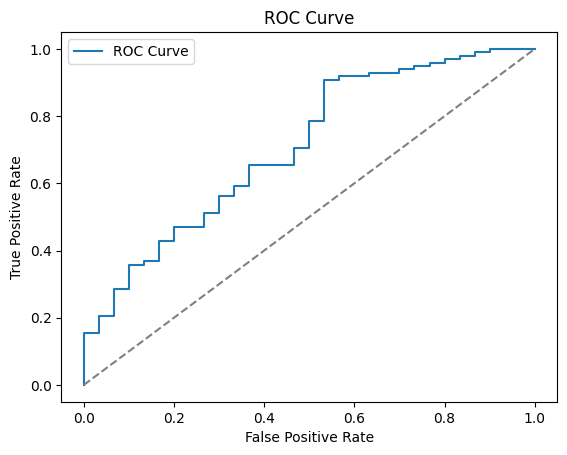

In [11]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray") 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

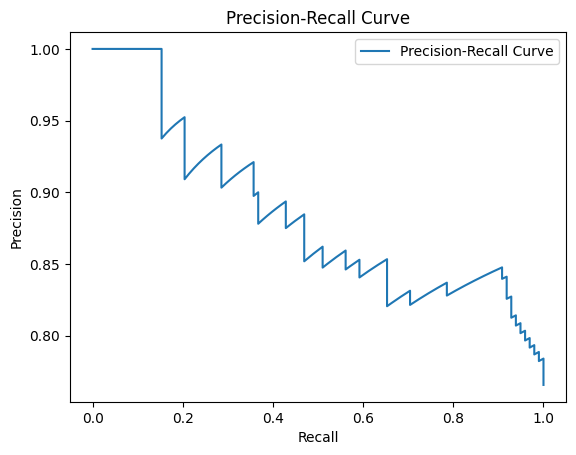

In [12]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [14]:
import joblib
joblib.dump(model, "../models/bioavailability.pkl")


['../models/bioavailability.pkl']